In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("mymoviedb.csv", engine='python')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [ ]:
df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.shape

(9837, 9)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [ ]:
#Data cleaning

In [ ]:
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors='coerce')

In [ ]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors='coerce')

In [ ]:
df[df.isnull().any(axis=1)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,NaN,NaN,None,None,None
1106,- Just Desserts,None,None,NaN,NaN,NaN,None,None,None
1107,- If The Hue Fits,None,None,NaN,NaN,NaN,None,None,None
1108,- Dust Up,None,None,NaN,NaN,NaN,None,None,None
1109,- Scents And Sensibility,None,None,NaN,NaN,NaN,None,None,None
1110,- Just One Of The Girls,None,None,NaN,NaN,NaN,None,None,None
1111,- Volleybug,None,None,NaN,NaN,NaN,None,None,None
1112,- Hide And Tink,None,None,NaN,NaN,NaN,None,None,None
1113,- Rainbow's Ends,None,None,NaN,NaN,NaN,None,None,None
1114,- Fawn And Games,None,None,NaN,NaN,NaN,None,None,None


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
df.shape

(9826, 9)

# Exploration Summary

- we have a dataframe consisting of 9827 rows and 9 columns.

- we have dropped the null values.

- our dataset has no duplicated values.

- Release_Date column needs to be casted into date time and to extract only the year value.

- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

- there is noticable outliers in Popularity column

- Vote_Average bettter be categorised for proper analysis.

- Genre column has comma separeted values and white spaces that needs to be handled and casted into category. Exploration Summary



In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [ ]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year

In [ ]:
print(df['Release_Date'].dtype)

int32


In [ ]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


**Dropping columns**

In [ ]:
cols = ["Overview", "Original_Language", "Poster_Url"]

In [ ]:
df.drop(cols, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**categorizing Vote_Average column**

We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using catigorize_col() function provided above.



In [ ]:
def categorize_col(df, col, labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
  df[col] = pd.cut(df[col],edges, labels=labels, duplicates='drop')
  return df


In [ ]:
labels = ['NOT_POPULAR', 'BELOW_AVG', 'AVERAGE', 'POPULAR']

In [ ]:
categorize_col(df, "Vote_Average", labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,POPULAR,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,BELOW_AVG,Thriller
3,2021,Encanto,2402.201,5076.0,POPULAR,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,AVERAGE,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896.0,POPULAR,"Drama, Crime"
9833,2020,Violent Delights,13.356,8.0,NOT_POPULAR,Horror
9834,2016,The Offering,13.355,94.0,NOT_POPULAR,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152.0,AVERAGE,"Music, Drama, History"


In [ ]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,POPULAR,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,BELOW_AVG,Thriller
3,2021,Encanto,2402.201,5076.0,POPULAR,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,AVERAGE,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896.0,POPULAR,"Drama, Crime"
9833,2020,Violent Delights,13.356,8.0,NOT_POPULAR,Horror
9834,2016,The Offering,13.355,94.0,NOT_POPULAR,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152.0,AVERAGE,"Music, Drama, History"


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
NOT_POPULAR,2467
POPULAR,2450
AVERAGE,2411
BELOW_AVG,2398


We'd split geners into a list and then explode our dataframe to have only one gener per row for each movie


In [ ]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Science Fiction
3,2022,The Batman,3827.658,1151.0,POPULAR,Crime
4,2022,The Batman,3827.658,1151.0,POPULAR,Mystery


In [ ]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  int32   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 756.6+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Release_Date,102
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,4
Genre,19


# DATA VISUALATION

In [ ]:
sns.set_style('whitegrid')

# Which is the most frequent gener of movies released on Netflix?

In [ ]:
df['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


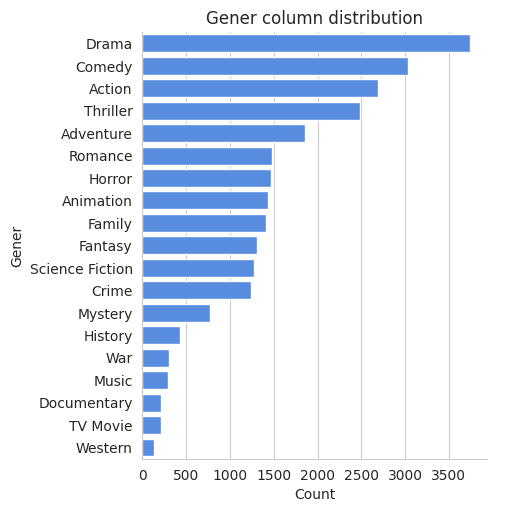

In [ ]:
sns.catplot(df, y='Genre', kind='count', order=df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Gener column distribution')
plt.xlabel('Count')
plt.ylabel('Gener')
plt.show()

# Which has the higest votes in vote avg column

Text(32.24506172839507, 0.5, 'Vote_Average')

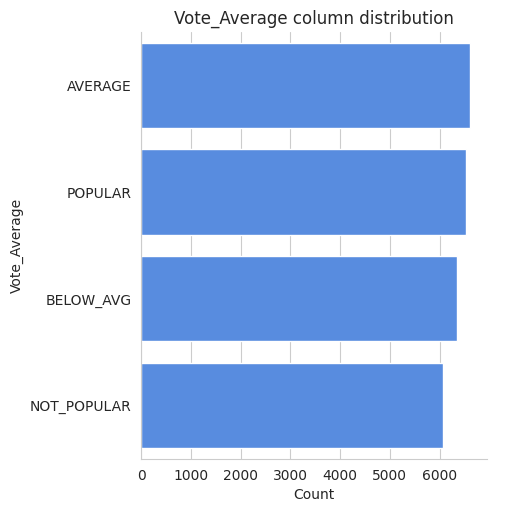

In [ ]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('Vote_Average column distribution')
plt.xlabel('Count')
plt.ylabel('Vote_Average')

# What movie git the higest popularity and whats its gener?



In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,POPULAR,Science Fiction


# What movie git the higest popularity and whats its gener?

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152.0,AVERAGE,Music
25787,2021,The United States vs. Billie Holiday,13.354,152.0,AVERAGE,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152.0,AVERAGE,History
25789,1984,Threads,13.354,186.0,POPULAR,War
25790,1984,Threads,13.354,186.0,POPULAR,Drama
25791,1984,Threads,13.354,186.0,POPULAR,Science Fiction


# Which year has most filmmed movies?

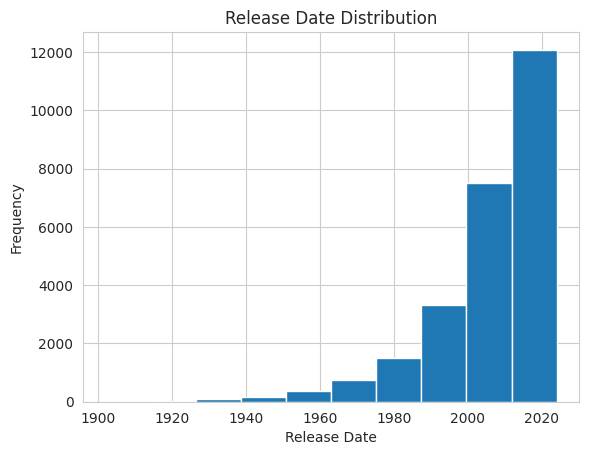

In [ ]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.show()

Conclusion

Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.



Q2: What genres has highest votes?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies p



Q3: What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.




Q4: What movie got the lowest popularity? what's its genre?
The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.




Q5: Which year has the most filmed movies?
year 2020 has the highest filming rate in our dataset.
